## Load external libraries

In [1]:
%matplotlib inline
from fns import *

## Prepare and run simulation

In [2]:
## simulation duration in ms
T = 30000

## create network object
gpu = TRN()

## simulation duration in ms
gpu.T = T

## external drives
### to TRN
gpu.nu = 40
### to relay neurons
gpu.nuE = 60

## populations
gpu.NE1 = 200
gpu.NI1 = 100

## choice of device (if less than 400 neurons, cpu can be faster than gpu)
gpu.device = '/gpu:0'

## network connectivity
gpu.WI1I1 = -200
gpu.wI1E1 = -1000
gpu.wE1I1 = 300

## sampling frequency (1: every time-step)
gpu.weight_step = 1
gpu.monitor_step = 1

## store all variables if True (requires RAM space)
gpu.monitor_single = True

## save spikes
gpu.spikeMonitor = True

## plasticity parameters
ratio = 15
gpu.A_LTD = 1.569e-5 
gpu.A_LTP = gpu.A_LTD * ratio

gpu.tau_q = 6000
gpu.q_thresh = 0.3

## update parameters
gpu.updateVars()

## run simulation
gpu.runTFSimul()


 Duration: 34.85



## Plot results

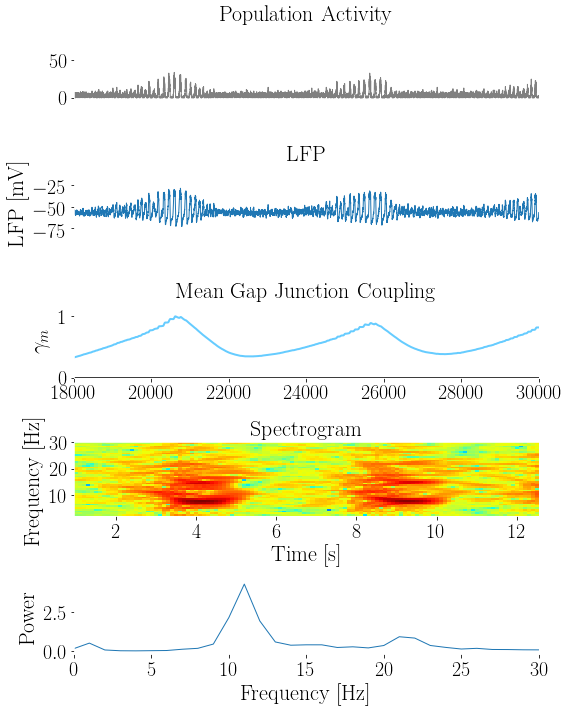

In [3]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)
dt=1
x = np.arange(0,T)
s, e = 18000, 30000

## population activity
ax1.plot(x, gpu.vvmI1, color='grey')
ax1.set_title('Population Activity')

## LTP
ax2.plot(x, gpu.vmI1/100)
ax2.set_ylabel('LFP [mV]')
ax2.set_title('LFP')

## Gap junction coupling
ax3.plot(x[:], gpu.gm1[0:]/gpu.gm1[1]*0.5, lw=2, color=gammaColor)
ax3.plot(x[:], np.zeros(len(gpu.gm1[:])), color='black')
ax3.set_ylim([0,1.2])
ax3.set_ylabel(r'$\gamma_m$')
ax3.set_title('Mean Gap Junction Coupling')

'''
spectrogram
'''
dt = 0.001 #seconds
NFFT = 2000     # the length of the windowing segments
Fs = 1/dt  # the sampling frequency
padto = 1500
x= np.arange(0,len(gpu.vvmI1[s-padto:e+padto])*dt,dt)
Pxx, freqs, bins, im = ax4.specgram(gpu.vvmI1[s-padto:e+padto], NFFT=NFFT, Fs=Fs, noverlap = NFFT-100, pad_to=padto,
                             detrend='constant', cmap=plt.cm.jet, vmin=None )

ax4.grid(False)
ax4.set_ylabel('Frequency [Hz]')
ax4.set_xlabel('Time [s]')
ax4.set_ylim([2,30])
ax4.set_title('Spectrogram')

pxx = np.mean(Pxx, axis=1)

## frequency histogram
ax5.plot(pxx)

ax5.set_xlim(0,30)
# ax5.set_ylim(0,3)
ax5.set_ylabel('Power')
ax5.set_xlabel('Frequency [Hz]')

for a in [ax1,ax2]:
    a.set_xticks([])
for ax in [ax1,ax2,ax3]:
    ax.set_xlim([s,e])
plt.tight_layout()

## Raster plot

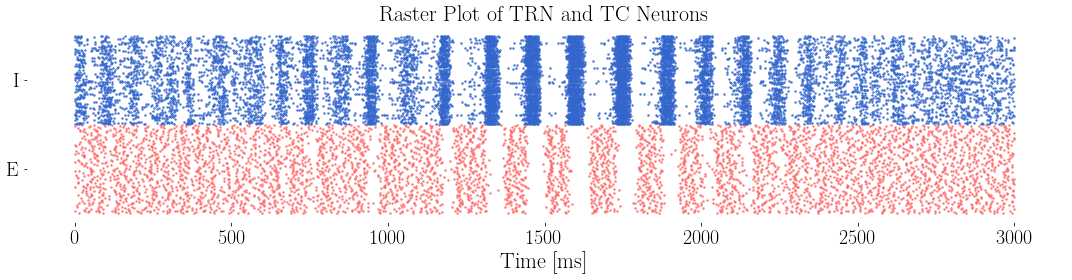

In [4]:
fig = plt.figure(figsize=(15,4))
s,e = 19000,22000
# s,e = 0,30000
x_I,y_I = np.where(gpu.raster[s:e,200:300]!=0)
x_E,y_E = np.where(gpu.raster[s:e,100:200]!=0)
plt.scatter(x_I,y_I, marker='.', s=10, color=Icolor, alpha=0.7)
plt.scatter(x_E,y_E-100, marker='.', s=10, color=Ecolor, alpha=0.7)
plt.yticks([-50,50], ['E', 'I'])
plt.xlabel('Time [ms]')
plt.title('Raster Plot of TRN and TC Neurons')
plt.tight_layout()